# Problem Sets
## Explanation

Each problem is labeled with a markdown cell.  
Code for the problem is included in the accompanying input,  
with the results in the corresponding cell output.

In [1]:
# Initial imports
%matplotlib inline
from __future__ import division,print_function
import numpy as np
import pandas as pd
import os, os.path
import math
import scipy.stats
import random
code_dir = '/Users/dave/Desktop/metis/prework/ThinkStats2/code'
os.chdir(code_dir)
import nsfg
import thinkstats2
import thinkplot
import chap01soln
import hinc
import hinc2
from estimation import RMSE, MeanError
import first
from hypothesis import DiffMeansPermute

## 2-4-cohens_d

In [2]:
print("## 2.4 Cohen's d")
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
def CohenEffectSize(g1,g2):
    d = g1.mean() - g2.mean()
    pooled_var = (len(g1)*g1.var() + len(g2)*g2.var())/(len(g1)+len(g2))
    return d/math.sqrt(pooled_var)
for col in ('prglngth','totalwgt_lb'):
    print('* {}: {}'.format(col,CohenEffectSize(firsts[col],others[col])))

## 2.4 Cohen's d
* prglngth: 0.0288790446544
* totalwgt_lb: -0.0886729270726


## 3-1-actual_biased

## 3-1-actual_biased


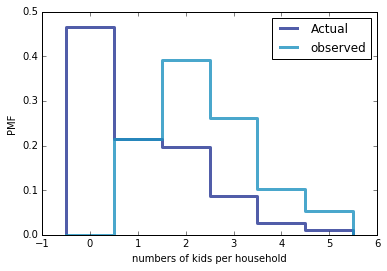

PMF: 1.02420515504
Biased PMF: 2.46186052597


In [3]:
print('## 3-1-actual_biased')
resp = chap01soln.ReadFemResp()
pmf = thinkstats2.Pmf(resp.numkdhh,label='Actual')
bias_pmf = pmf.Copy(label='observed')
for x,p in pmf.Items():
    bias_pmf.Mult(x,x)
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf,bias_pmf])
thinkplot.Show(xlabel='numbers of kids per household',ylabel='PMF')
print('PMF: {}'.format(pmf.Mean()))
print('Biased PMF: {}'.format(bias_pmf.Mean()))

## 4-2-random_dist

## 4-2-random_dist


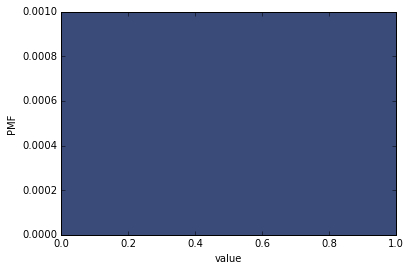

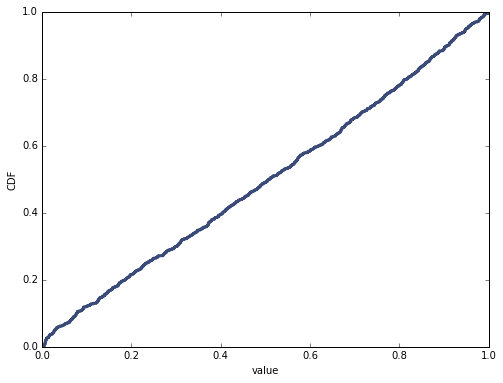

Distribution is uniform


In [14]:
print('## 4-2-random_dist')
data = [random.random() for _ in xrange(1000)]
pmf = thinkstats2.Pmf(data,)
cdf = thinkstats2.Cdf(data,)
thinkplot.Pmf(pmf)
thinkplot.Show(ylabel='PMF',xlabel='value')
thinkplot.Cdf(cdf)
thinkplot.Show(ylabel='CDF',xlabel='value')
print('Distribution is uniform')

## 5-1-blue_men

In [6]:
print('## 5-1-blue_men')
lower,upper = scipy.stats.norm.cdf(
        [177.8,185.42],
        loc=178,
        scale=7.7,
)
print('{0:0.1%}'.format(upper - lower))

## 5-1-blue_men
34.3%


## 6-1-household_income

In [13]:
print('## 6-1-household_income')
hinc_df = hinc.ReadData()
hinc_log_sample = hinc2.InterpolateSample(hinc_df,log_upper=6.0)
hinc_cdf = thinkstats2.Cdf(hinc_log_sample)
hinc_output = {}
hinc_output['median'] = hinc_cdf.Value(0.5)
hinc_output['mean'] = thinkstats2.RawMoment(hinc_log_sample,1)
hinc_var = thinkstats2.CentralMoment(hinc_log_sample,2)
hinc_std = math.sqrt(hinc_var)
hinc_output['skewness'] = thinkstats2.CentralMoment(hinc_log_sample,3)/(hinc_std ** 3)
hinc_output["Pearson's skewness"] = 3*(hinc_output['mean'] - hinc_output['median'])/hinc_std
for k,v in sorted(hinc_output.items()):
    print('{}: {:0.4}'.format(k,v))

print('Fraction below mean: {:0.2%}'.format(hinc_cdf[hinc_output['mean']]))
print('Increasing the upper bound increases the mean more than it increases the median, increasing skewness.')

## 6-1-household_income
Pearson's skewness: -0.3379
mean: 4.658
median: 4.709
skewness: -0.6414
Fraction below mean: 45.06%
Increasing the upper bound increases the mean more than it increases the median, increasing skewness.


## 7-1-weight_vs_age

## 7-1-weight_vs_age


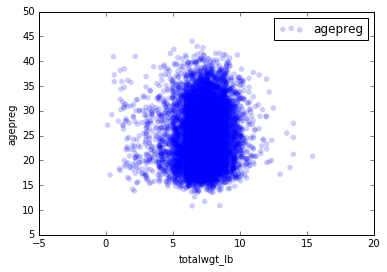

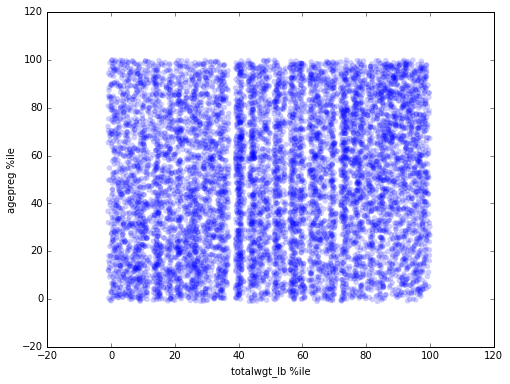

pearson's: 0.0688339703541
spearman's: 0.0946100410966
Not correlated.


In [8]:
#preg = nsfg.ReadFemPreg() # loaded earlier
print('## 7-1-weight_vs_age')
preg = preg.dropna(subset=['totalwgt_lb','agepreg'])
thinkplot.Scatter(preg.totalwgt_lb,preg.agepreg)
thinkplot.Show(xlabel='totalwgt_lb',ylabel='agepreg')
totalwgt_lb_cdf = thinkstats2.Cdf(preg.totalwgt_lb)
agepreg_cdf = thinkstats2.Cdf(preg.agepreg)
thinkplot.Scatter(thinkstats2.Jitter([int(totalwgt_lb_cdf[_]*100) for _ in preg.totalwgt_lb],1),
                  thinkstats2.Jitter([int(agepreg_cdf[_]*100) for _ in preg.agepreg],1))
thinkplot.Show(xlabel='totalwgt_lb %ile',ylabel='agepreg %ile')
for method in ('pearson','spearman'):
    print("{}'s: {}".format(method,preg.totalwgt_lb.corr(preg.agepreg,method=method)))
print('Not correlated.')

## 8-2-sampling_dist

## 8-2-sampling_dist


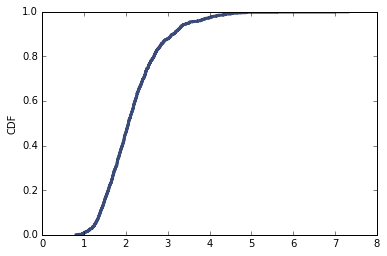

Standard error: 0.7579
Confidence interval: [1.381,3.142]


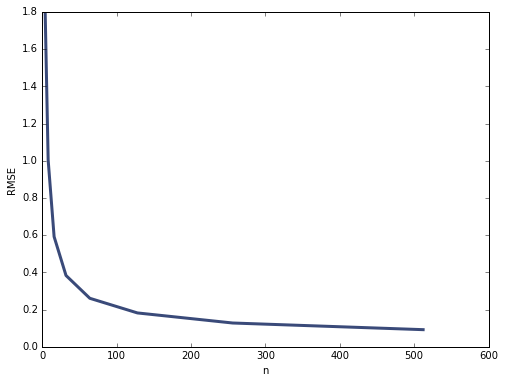

In [10]:
print('## 8-2-sampling_dist')
def expon_sample(n=10,lam=2):
    xs = np.random.exponential(1.0/lam,n)
    L = 1/np.mean(xs)
    return L
l_estimates = [expon_sample() for _ in xrange(1000)]
#l_pmf = thinkstats2.Pmf(l_estimates)
l_cdf = thinkstats2.Cdf(l_estimates)
thinkplot.Cdf(l_cdf)
thinkplot.Show(ylabel='CDF')
print('Standard error: {:0.4}'.format(RMSE(l_estimates,2.)))
print('Confidence interval: [{:0.4},{:0.4}]'.format(l_cdf.Value(0.10),l_cdf.Value(0.90)))
def std_error_vs_n(n,lam=2,repeats=1000):
    l_estimates = [expon_sample(n,lam) for _ in xrange(repeats)]
    return RMSE(l_estimates,lam)
n_s = [2**_ for _ in xrange(2,10)]
errors = [std_error_vs_n(n) for n in n_s]
thinkplot.Plot(n_s,errors)
thinkplot.Show(ylabel='RMSE',xlabel='n')

## 8-3-scoring

## 8-3-scoring
RMSE: 1.39914259459
Mean Error: -0.0112
Confidence interval:[0,4]


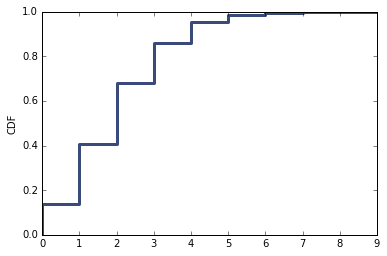

Does not appear to be biased.


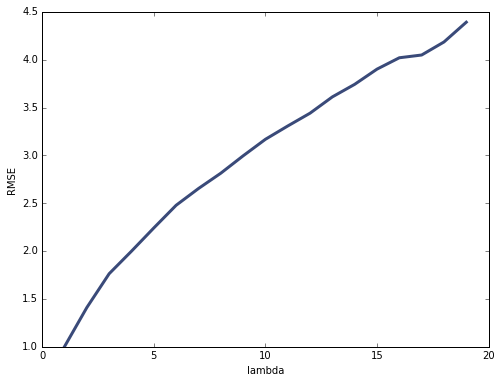

RMSE increases with Lambda


In [11]:
print('## 8-3-scoring')
def game(lam=2.,time=1):
    goals = 0
    while time > 0:
        time -= np.random.exponential(1/lam)
        if time > 0:
            goals += 1
    return goals
def multiple_games(repeats=10000,lam=2,time=1,display=False):
    simulations = [game(lam,time) for _ in xrange(repeats)]
    cdf = thinkstats2.Cdf(simulations)
    if display:
        print('RMSE: {}'.format(RMSE(simulations,lam)))
        print('Mean Error: {}'.format(MeanError(simulations,lam)))
        print('Confidence interval:[{},{}]'.format(cdf.Value(0.1),cdf.Value(0.9)))
        thinkplot.Cdf(cdf)
        thinkplot.Show(ylabel='CDF')
    return RMSE(simulations,lam)
multiple_games(display=True)
print('Does not appear to be biased.')
errors = [multiple_games(lam=lam) for lam in xrange(1,20)]
thinkplot.Plot(range(1,20),errors)
thinkplot.Show(xlabel='lambda',ylabel='RMSE')
print('RMSE increases with Lambda')

## 9-2-resampling

In [12]:
print('## 9-2-resampling')
class DiffMeansResample(DiffMeansPermute):
    def RunModel(self):
        group1 = np.random.choice(self.pool,self.n,replace=True)
        group2 = np.random.choice(self.pool,self.m,replace=True)
        return group1,group2

lives, firsts, others = first.MakeFrames()
for col in ['prglngth','totalwgt_lb']:
    data = firsts[col].dropna().values,others[col].dropna().values
    ht = DiffMeansResample(data)
    ht_permute = DiffMeansPermute(data)
    pvalue = ht.PValue()
    pvalue_permute = ht_permute.PValue()
    print('{}: {} ({})'.format(col,pvalue,pvalue_permute))
print('Resampling vs permutation does not change results much.')

## 9-2-resampling
prglngth: 0.196 (0.146)
totalwgt_lb: 0.0 (0.0)
Resampling vs permutation does not change results much.
